In [1]:
import os
#FOLDER = os.path.dirname(__file__)
FOLDER = os.getcwd()

In [2]:
FOLDER_DATA = os.path.join(FOLDER, "sample_data/")
FOLDER_DATA

'D:\\dash_apps\\sipviz\\sample_data/'

In [3]:
import sipviz.data_preparation as dp
data = dp.process_solutions_to_dictionary()

In [4]:
[len([i+1 for i in gdf['stand'] - 1 if data[2][1][i] == j]) for j in range(7)]

NameError: name 'gdf' is not defined

{0: {1: array([1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 5, 1, 1, 1, 5, 5, 0, 1, 1, 2, 1,
         2, 0, 5, 0, 2, 0, 1, 1, 4, 2, 1, 3, 3, 5, 3, 1, 4, 4, 4, 0, 2, 0,
         6, 3, 1, 3, 1, 1, 0, 1, 3, 1, 4, 2, 1, 0, 1, 0, 1, 4, 0, 0, 1, 6,
         0, 0, 0, 2, 1, 0, 0, 4, 0, 2, 2, 5, 3, 3, 0, 1, 1, 2, 0, 2, 1, 0,
         1, 1, 1, 2, 1, 0, 4, 1, 3, 1, 1, 1, 3, 2, 5, 1, 1, 0, 4, 0, 1, 2,
         1, 0, 1, 0, 1, 1, 4, 6, 1, 0, 0, 0, 0, 0, 1, 6, 1, 3, 3, 3, 0, 6,
         3, 2, 4, 5, 6, 4, 1, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 2, 1, 1, 0,
         0, 0, 3, 1, 0, 0, 0, 1, 2, 1, 0, 4, 4, 3, 2, 1, 1, 1, 1, 5, 1, 1,
         2, 2, 1, 0, 1, 6, 5, 0, 1, 1, 1, 4, 5, 1, 0, 0, 1, 3, 3, 1, 0, 1,
         1, 3, 2, 1, 0, 0, 1, 0, 6, 0, 3, 1, 1, 2, 1, 0, 5, 4, 1, 0, 0, 3,
         0, 1, 4, 1, 0, 1, 1, 4, 1, 5, 3, 1, 0, 1, 3, 6, 1, 3, 3, 1, 2, 0,
         0, 0, 1, 1, 0, 1, 1, 4, 6, 0, 6, 0, 0, 0, 6, 1, 0, 4, 0, 0, 0, 2,
         0, 6, 1, 4, 0, 3, 1, 3, 1, 4, 0, 0, 2, 0, 6, 0, 0, 0, 3, 1, 4, 1,
         1, 0, 0, 0

In [5]:
import plotly.plotly as py
import plotly.tools as tls
import matplotlib
import plotly.graph_objs as go

In [6]:
import json
import geopandas as gpd

In [32]:
gdf = gpd.read_file(os.path.join(FOLDER, 'shp/good_fake.shp'))
gdf.columns = ['stand', 'geometry']
my_json = gdf.to_json()
gdf.head()

,stand,geometry
0,1,"POLYGON ((12 57, 14.88675134594813 62, 20.6602..."
1,2,"POLYGON ((12 67, 14.88675134594813 72, 20.6602..."
2,3,"POLYGON ((12 77, 14.88675134594813 82, 20.6602..."
3,4,"POLYGON ((12 87, 14.88675134594813 92, 20.6602..."
4,5,"POLYGON ((12 97, 14.88675134594813 102, 20.660..."


In [14]:
gdf = gdf.to_crs({'init':'epsg:4326'})

In [15]:
gdf.to_file(os.path.join(FOLDER,'shp/good_fake.json'), driver='GeoJSON')

DriverIOError: GeoJSON driver doesn't support creating a layer on a read-only datasource

In [ ]:
import numpy as np
gdf['period']=[np.nan]*len(gdf)

In [ ]:
gdf.head()

In [ ]:
xs=[]; ys=[]; xys=[]
for idx, row in gdf.iterrows(): 
    x,y=row.geometry.exterior.coords.xy
    xs.append(x)
    ys.append(y)
    z = list(zip(x,y))
    xys.append(z)
gdf['long'] = xs
gdf['lat'] = ys
gdf['corners'] = xys

In [ ]:
gdf.corners

In [ ]:
gdf['long_lat'].coords.x

In [16]:
def get_lon_lat(gdf):
    lon = []
    lat = []
    for _, row in gdf.iterrows():
        lon.append(row.geometry.centroid.x)
        lat.append(row.geometry.centroid.y)
    return lon, lat
lon, lat = get_lon_lat(gdf)

In [44]:
with open('./shp/good_fake.json') as f:
    j = json.load(f)
j['features'][0]['properties']['stand'] # returns the stand. that is great

1

In [24]:
m

'type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"stand": 1}, "geometry": {"type": "Polygon", "coordinates": [[[12.0, 57.0], [14.88675134594813, 62.0], [20.66025403784439, 62.0], [23.54700538379252, 57.0], [20.66025403784439, 52.0], [14.88675134594813, 52.0], [12.0, 57.0]]]}}, {"id": "1", "type": "Feature", "properties": {"stand": 2}, "geometry": {"type": "Polygon", "coordinates": [[[12.0, 67.0], [14.88675134594813, 72.0], [20.66025403784439, 72.0], [23.54700538379252, 67.0], [20.66025403784439, 62.0], [14.88675134594813, 62.0], [12.0, 67.0]]]}}, {"id": "2", "type": "Feature", "properties": {"stand": 3}, "geometry": {"type": "Polygon", "coordinates": [[[12.0, 77.0], [14.88675134594813, 82.0], [20.66025403784439, 82.0], [23.54700538379252, 77.0], [20.66025403784439, 72.0], [14.88675134594813, 72.0], [12.0, 77.0]]]}}, {"id": "3", "type": "Feature", "properties": {"stand": 4}, "geometry": {"type": "Polygon", "coordinates": [[[12.0, 87.0], [14.8867513

In [77]:
import xmltodict
import numpy as np


In [88]:
def get_final_result_data(n_stands, n_periods)
    """ Computes the final solution from the progressive hedging variable
        fixing algorithm. It gives the solution for all the sceanrios and the 
        expected volume harvested in each period for each scenario
        
        Parameters
        ---------------
        n_stands: int number of stands that the problem is run on
        n_periods: int number of periods in which there is expected to have harverst
        
        Note that both variables can be computed by a private function included in this software
        
        Returns
        ---------------
        final_sol_dict: dictionary of scenarios as keys and a list of stands as value where the period at which
                        the stand is harvested is used in place of the stand id. The index of the list is used 
                        as the id of the stand
        volumes_dict: dictionary of scenarios as keys and the list of periods as values. The index of the list is 
                        as the period - 1 in which the volume is harversted. The value in the list is the actual 
                        volumes
    """
    with open(os.path.join(FOLDER_DATA, 'final.sol')) as fd:
                final = xmltodict.parse(fd.read())
    solutions = final['CPLEXSolution']['variables']['variable']
    final_sol_dict = {}
    volumes_dict = {}

    for i in range(len(solutions)):
        one_sol_row = solutions[i]
        one_sol = one_sol_row['@name']
        if one_sol.startswith('x') or one_sol.startswith('X'):
            _,s,w,p = one_sol.split('_')
            w = int(w); s = int(s); p = int(p)
            #print(solutions[i]['@value'])
            if int(float(one_sol_row['@value'])) == 1:
                if w not in final_sol_dict: # create the scenario if not exist
                    final_sol_dict[w] = np.zeros(n_stands, dtype=int)
                final_sol_dict[w][s - 1] = p
        elif one_sol.startswith('s') or one_sol.startswith('S'):
            _,w,p = one_sol.split('_')
            w = int(w); p = int(p)
            if w not in volumes_dict:
                volumes_dict[w] = np.zeros(n_periods, dtype=float)
            volumes_dict[w][p - 1] = float(one_sol_row['@value'])
    return final_sol_dict, volumes_dict

In [81]:
final_sol_dict[1]

array([4, 6, 1, 0, 1, 2, 0, 2, 4, 1, 0, 3, 1, 1, 1, 4, 3, 0, 1, 1, 2, 1,
       1, 0, 6, 0, 2, 5, 4, 1, 4, 2, 1, 2, 3, 3, 2, 1, 4, 4, 3, 0, 2, 0,
       5, 2, 4, 2, 1, 2, 0, 1, 2, 1, 3, 2, 1, 0, 3, 0, 1, 3, 0, 5, 1, 6,
       0, 0, 0, 2, 4, 0, 0, 4, 5, 1, 1, 4, 2, 2, 0, 3, 3, 2, 5, 1, 1, 0,
       3, 1, 1, 2, 1, 0, 4, 3, 3, 1, 2, 1, 2, 2, 3, 4, 3, 6, 3, 0, 1, 1,
       5, 0, 1, 6, 1, 1, 6, 5, 2, 6, 0, 3, 5, 5, 1, 5, 1, 2, 5, 3, 5, 5,
       3, 2, 3, 3, 3, 3, 1, 1, 5, 1, 0, 0, 0, 3, 1, 1, 0, 0, 2, 3, 1, 6,
       6, 6, 2, 1, 6, 6, 0, 1, 2, 1, 0, 3, 3, 2, 2, 4, 4, 1, 1, 4, 1, 1,
       2, 1, 1, 6, 4, 6, 4, 0, 1, 1, 1, 3, 4, 1, 0, 0, 1, 2, 3, 1, 0, 1,
       1, 3, 2, 1, 0, 6, 4, 0, 4, 0, 3, 1, 1, 2, 1, 6, 3, 4, 1, 0, 0, 2,
       4, 1, 4, 1, 0, 1, 1, 5, 3, 4, 2, 1, 0, 1, 3, 5, 4, 3, 4, 1, 2, 6,
       0, 4, 1, 1, 3, 4, 1, 5, 5, 0, 5, 6, 3, 6, 5, 1, 0, 3, 0, 0, 5, 1,
       0, 5, 1, 5, 0, 2, 2, 2, 1, 4, 0, 0, 1, 0, 6, 0, 0, 6, 2, 1, 6, 4,
       5, 6, 0, 5, 1, 2, 4, 1, 0, 5, 4, 0, 0, 3])

In [91]:
volumes_dict[1]

array([83491.3808, 62722.2788, 47321.3706, 36057.0382, 27279.4302,
       21570.7248])

In [103]:
species = ['Abies tortica', 'Picea tuga', 'Cedrus alba']
import random as rd
import pandas as pd

In [108]:
stand_info = pd.DataFrame(dict(
    standid = [i for i in range(1,301)],
    species = [rd.choice(species) for _ in range(300)],
    area = [rd.uniform(100, 400) for _ in range(300)],
    age = [rd.randint(20, 120) for _ in range(300)]
))

In [109]:
stand_info.to_csv('stand_info.csv', index=False)

In [49]:
import pandas as pd
import geopandas as gpd
import os

In [42]:
FILE = './shp/stands07.shp'
shp_pack = gpd.read_file(FILE)

In [43]:
shp_pack['geometry'].head(1)

0    POLYGON ((1197741.714538446 560696.310072938, ...
Name: geometry, dtype: object

In [44]:
shp_pack['geometry'] = shp_pack['geometry'].to_crs(epsg=4326)

In [45]:
shp_pack['geometry'].head(1)

0    POLYGON ((-122.2696292363648 46.85726927196648...
Name: geometry, dtype: object

In [46]:
shp_pack.drop(shp_pack.iloc[:,0:len(shp_pack.columns)-1], axis=1, inplace=True)

In [52]:
shp_pack.to_file('./shp/pack_proj.json', driver='GeoJSON')

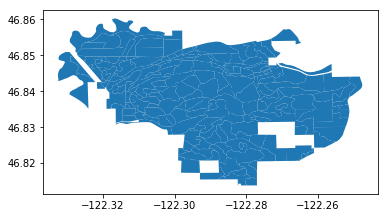

In [54]:
shp_pack.plot()

In [37]:
shp_pack.to_file('./shp/pack_proj.shp')

In [40]:
pack_df = shp_pack[['UNIT_NAME', 'SPECIES', 'ACRES', 'AGE_2007', 'SITE_INDEX']]

In [41]:
pack_df.to_csv('./shp/stand_info.csv')

In [61]:
f,s =zip(*[(i, i*2) for i in range(10)])

In [62]:
f

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [63]:
s

(0, 2, 4, 6, 8, 10, 12, 14, 16, 18)